In [ ]:
# Decomposição de série temporal - Newton Teixeira

In [2]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
# Carregamento da base de dados
base = pd.read_csv('dataset-tensao-barras-mes-jan-2021.csv', skiprows=0, sep = ';')
base.head(5)
#base.shape

,codregional,barra,data_hora,data_hora_v2,data,data_v2,horario,nminuto,lim_inf,lim_recom,...,tipo_dia,id_tipo_carga,tipo_carga,is_calcular_dtf,bit_ddf,bit_fdf,bit_fdf_acls,bit_fdf_abli,is_preprocessado,tipo_preprocessamento
0,OTLM,BSBP4-01,2021-01-01 00:00:00,01/01/2021 00:00:00,2021-01-01,01/01/2021,00:00,0,68.0,69.0,...,DIA_UTIL,-1,-1,t,-1,-1,-1,-1,t,valor_referencia
1,OTLM,BSBP4-01,2021-01-01 00:01:00,01/01/2021 00:01:00,2021-01-01,01/01/2021,00:01,1,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
2,OTLM,BSBP4-01,2021-01-01 00:02:00,01/01/2021 00:02:00,2021-01-01,01/01/2021,00:02,2,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
3,OTLM,BSBP4-01,2021-01-01 00:03:00,01/01/2021 00:03:00,2021-01-01,01/01/2021,00:03,3,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN
4,OTLM,BSBP4-01,2021-01-01 00:04:00,01/01/2021 00:04:00,2021-01-01,01/01/2021,00:04,4,68.0,69.0,...,DIA_UTIL,3,CARGA_MEDIA,t,1,0,0,0,f,NaN


In [5]:
# Visualização do tipo de dados dos atributos
print(base.dtypes)

base.describe(include="all")

codregional               object
barra                     object
data_hora                 object
data_hora_v2              object
data                      object
data_v2                   object
horario                   object
nminuto                    int64
lim_inf                  float64
lim_recom                float64
lim_sup                  float64
valor_tensao             float64
status_carga_1            object
status_carga_2            object
id_tipo_dia                int64
tipo_dia                  object
id_tipo_carga              int64
tipo_carga                object
is_calcular_dtf           object
bit_ddf                    int64
bit_fdf                    int64
bit_fdf_acls               int64
bit_fdf_abli               int64
is_preprocessado          object
tipo_preprocessamento     object
dtype: object


,codregional,barra,data_hora,data_hora_v2,data,data_v2,horario,nminuto,lim_inf,lim_recom,...,tipo_dia,id_tipo_carga,tipo_carga,is_calcular_dtf,bit_ddf,bit_fdf,bit_fdf_acls,bit_fdf_abli,is_preprocessado,tipo_preprocessamento
count,535680,535680,535680,535680,535680,535680,535680,535680.000000,535680.000000,535680.000000,...,535680,535680.000000,535680,535680,535680.000000,535680.000000,535680.000000,535680.000000,535680,56040
unique,1,12,44640,44640,31,31,1440,NaN,NaN,NaN,...,3,NaN,5,1,NaN,NaN,NaN,NaN,2,1
top,OTLM,MRBP5-01,2021-01-16 06:17:00,02/01/2021 01:40:00,2021-01-30,23/01/2021,02:39,NaN,NaN,NaN,...,DIA_UTIL,NaN,CARGA_MEDIA,t,NaN,NaN,NaN,NaN,f,valor_referencia
freq,535680,44640,12,12,17280,17280,372,NaN,NaN,NaN,...,362880,NaN,290275,535680,NaN,NaN,NaN,NaN,479640,56040
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.500000,80.793526,82.146074,...,NaN,2.555081,NaN,NaN,0.745923,-0.059767,-0.091626,-0.117604,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.692482,26.216539,26.772780,...,NaN,1.395527,NaN,NaN,0.631468,0.381956,0.375589,0.368282,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,67.500000,68.500000,...,NaN,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.750000,68.500000,69.500000,...,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.500000,69.000000,70.000000,...,NaN,3.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.250000,70.000000,71.500000,...,NaN,3.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN


In [6]:
base['data'] = pd.to_datetime(base['data'])
base['data_v2'] = pd.to_datetime(base['data_v2'])
base['data_hora'] = pd.to_datetime(base['data_hora'])
base['data_hora_v2'] = pd.to_datetime(base['data_hora_v2'])

In [7]:
df_aux = base[['barra','data','horario','data_hora','lim_inf','lim_recom','lim_sup','valor_tensao'] ]
df_aux.dtypes

barra                   object
data            datetime64[ns]
horario                 object
data_hora       datetime64[ns]
lim_inf                float64
lim_recom              float64
lim_sup                float64
valor_tensao           float64
dtype: object

In [8]:
df_barras = base['barra'].unique()
df_barras

array(['BSBP4-01', 'CHBP4-01', 'IZBP4-01', 'LIBP4-02', 'LIBP4-01',
       'LTBP4-01', 'MRBP4-01', 'PDBR4-01', 'PFBP4-01', 'PRBR4-01',
       'MRBP5-01', 'PFBP5-01'], dtype=object)

In [19]:
df = base
df = df_aux.loc[(df_aux.barra == 'PFBP4-01') & ( df_aux.data >= '2021-01-01' ) &  (df_aux.data <= '2021-01-07') & (df_aux.horario.str.endswith('00') )]
df = df[['data_hora','horario','lim_inf','lim_recom','lim_sup','valor_tensao'] ]


In [20]:
df

,data_hora,horario,lim_inf,lim_recom,lim_sup,valor_tensao
357120,2021-01-01 00:00:00,00:00,69.0,70.0,70.5,70.00
357180,2021-01-01 01:00:00,01:00,69.0,70.0,70.5,69.95
357240,2021-01-01 02:00:00,02:00,69.0,70.0,70.5,70.43
357300,2021-01-01 03:00:00,03:00,69.0,70.0,70.5,70.40
357360,2021-01-01 04:00:00,04:00,69.0,70.0,70.5,70.69
...,...,...,...,...,...,...
366900,2021-01-07 19:00:00,19:00,69.5,70.3,71.0,70.02
366960,2021-01-07 20:00:00,20:00,69.5,70.3,71.0,70.19
367020,2021-01-07 21:00:00,21:00,69.5,70.3,71.0,69.98
367080,2021-01-07 22:00:00,22:00,69.5,70.3,71.0,70.53


In [21]:
# Criando um range de datas com frequência de segundos
#rng = pd.date_range('1/1/2021', periods = 144, freq='T')
ts = df['valor_tensao']
ts.index = df['data_hora']

In [22]:
df.head(15)

,data_hora,horario,lim_inf,lim_recom,lim_sup,valor_tensao
357120,2021-01-01 00:00:00,00:00,69.0,70.0,70.5,70.00
357180,2021-01-01 01:00:00,01:00,69.0,70.0,70.5,69.95
357240,2021-01-01 02:00:00,02:00,69.0,70.0,70.5,70.43
357300,2021-01-01 03:00:00,03:00,69.0,70.0,70.5,70.40
357360,2021-01-01 04:00:00,04:00,69.0,70.0,70.5,70.69
357420,2021-01-01 05:00:00,05:00,69.0,70.0,70.5,69.70
357480,2021-01-01 06:00:00,06:00,68.5,69.0,70.0,69.71
357540,2021-01-01 07:00:00,07:00,68.5,69.0,70.0,69.32
357600,2021-01-01 08:00:00,08:00,69.0,70.0,70.5,69.09
357660,2021-01-01 09:00:00,09:00,69.0,70.0,70.5,69.10


In [23]:
ts

data_hora
2021-01-01 00:00:00    70.00
2021-01-01 01:00:00    69.95
2021-01-01 02:00:00    70.43
2021-01-01 03:00:00    70.40
2021-01-01 04:00:00    70.69
                       ...  
2021-01-07 19:00:00    70.02
2021-01-07 20:00:00    70.19
2021-01-07 21:00:00    69.98
2021-01-07 22:00:00    70.53
2021-01-07 23:00:00    70.42
Name: valor_tensao, Length: 168, dtype: float64

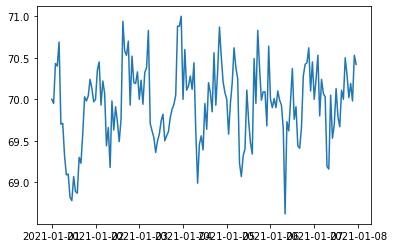

In [24]:
# Visualização da série temporal
plt.plot(ts)

In [25]:
# Decomposição da série temporal, criando uma variável para cada formato
#decomposicao = seasonal_decompose(ts)
decomposicao = seasonal_decompose(ts) 
decomposicao

In [26]:
decomposicao

In [27]:
#tendencia
tendencia = decomposicao.trend
tendencia

data_hora
2021-01-01 00:00:00   NaN
2021-01-01 01:00:00   NaN
2021-01-01 02:00:00   NaN
2021-01-01 03:00:00   NaN
2021-01-01 04:00:00   NaN
                       ..
2021-01-07 19:00:00   NaN
2021-01-07 20:00:00   NaN
2021-01-07 21:00:00   NaN
2021-01-07 22:00:00   NaN
2021-01-07 23:00:00   NaN
Name: trend, Length: 168, dtype: float64

In [28]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data_hora
2021-01-01 00:00:00    0.049436
2021-01-01 01:00:00    0.192630
2021-01-01 02:00:00    0.201727
2021-01-01 03:00:00    0.082804
2021-01-01 04:00:00    0.332318
                         ...   
2021-01-07 19:00:00    0.171068
2021-01-07 20:00:00    0.406276
2021-01-07 21:00:00    0.491068
2021-01-07 22:00:00    0.260304
2021-01-07 23:00:00    0.467977
Name: seasonal, Length: 168, dtype: float64

In [29]:
#erro
aleatorio = decomposicao.resid
aleatorio

data_hora
2021-01-01 00:00:00   NaN
2021-01-01 01:00:00   NaN
2021-01-01 02:00:00   NaN
2021-01-01 03:00:00   NaN
2021-01-01 04:00:00   NaN
                       ..
2021-01-07 19:00:00   NaN
2021-01-07 20:00:00   NaN
2021-01-07 21:00:00   NaN
2021-01-07 22:00:00   NaN
2021-01-07 23:00:00   NaN
Name: resid, Length: 168, dtype: float64

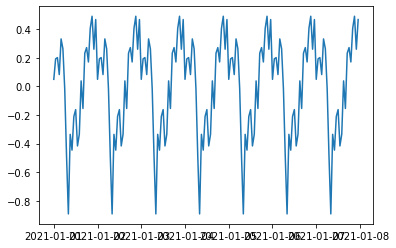

In [30]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)

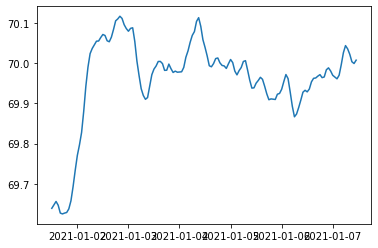

In [31]:
plt.plot(tendencia)

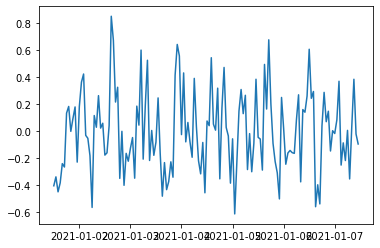

In [32]:
plt.plot(aleatorio)

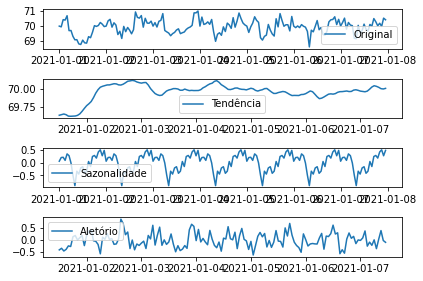

In [33]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()